In [1]:
import datetime as dt
import numpy as np
import pickle

import datetime as dt

from plot_kafka_retrieval_utils import extract_pixel, plot_pixel_tseries

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def get_pixel(filepath, year, x, y):
    """
    Get retrieved parameters and uncertainties for a single pixel
    This will open the data from a pickle file if it exists, otherwise
    it calls extract_pixel, which will get the data and also store a pickle file
    for next time.
    """
    file = filepath+"/pixel_{}_{}.pkl".format(x,y)
    try:
        data, uncs, dates = pickle.load(open(file, 'rb'))
    except FileNotFoundError:
        data, uncs, dates = extract_pixel(filepath, year, x,y, params=None, outfile=file)
    return data, uncs, dates

## Plot a single parameter and uncertainty

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:165: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


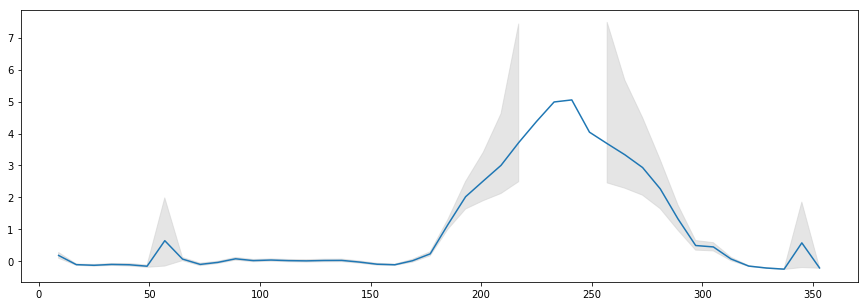

In [4]:
file = "/home/npounder/output/kafka/28Mar/kafkaout_prop_LAI_Q0-25/"
param = "TeLAI"
x = 698; y= 1230
fig, ax = plt.subplots(1,1, figsize=(15,5))
data, uncs, dates = get_pixel(file, 2017, x,y)
plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)

In [3]:
def plot_all_params(axs, params, filepaths, year, x, y, legend = None):
    """loop through different retrieval direcories and plot all parameters"""
    for ax, param in zip(axs, params):
        title = "{}".format(param)
        if param == "LAI":
            param = "TeLAI"
            convertLAI = True
        else:
            convertLAI = False
        for f in filepaths:
            data, uncs, dates = get_pixel(f, year, x,y)
            plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                               marker='-', convertLAI=convertLAI)
        ax.set_title(title)
        if legend !=None:
            ax.legend(legend)
    return axs

In [4]:
# These [parameters may be used for any broadband SAIL retrieval]
params=["LAI","TeLAI", "w_nir", "x_nir", "a_nir",
        "w_vis", "x_vis", "a_vis"]

## Rice, Spain

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:164: RuntimeWarning: invalid value encountered in log
  data = -2*np.log(data)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:165: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:166: RuntimeWarning: invalid value encountered in log
  u_unc = -2.*np.log(u_unc)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67805f7080>,
      dtype=object)

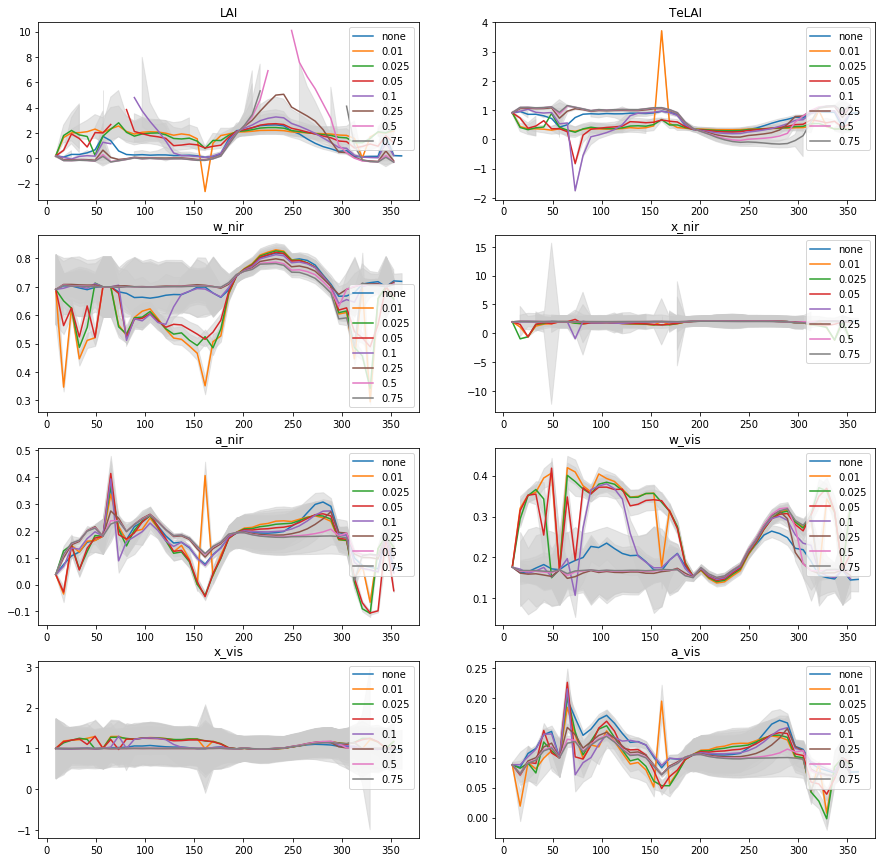

In [5]:
filepaths = ["/home/npounder/output/kafka/28Mar/kafkaout_no_prop_HessCorr/",
             "/home/npounder/output/kafka/28Mar/kafkaout_prop_LAI_Q0-01/",
             "/home/npounder/output/kafka/28Mar/kafkaout_prop_LAI_Q0-025/",
             "/home/npounder/output/kafka/28Mar/kafkaout_prop_LAI_Q0-05/",
             "/home/npounder/output/kafka/28Mar/kafkaout_prop_LAI_Q0-1/",
             "/home/npounder/output/kafka/28Mar/kafkaout_prop_LAI_Q0-25/",
             "/home/npounder/output/kafka/28Mar/kafkaout_prop_LAI_Q0-5/",
             "/home/npounder/output/kafka/28Mar/kafkaout_prop_LAI_Q0-75/"]
legend = ("none","0.01", "0.025", "0.05", "0.1", "0.25", "0.5", "0.75")
x = 698; y= 1230

fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()
plot_all_params(axs, params, filepaths, 2017, x, y, legend = legend)

## Bondville, wheat

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:165: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:164: RuntimeWarning: invalid value encountered in log
  data = -2*np.log(data)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f674b58a588>,
      dtype=object)

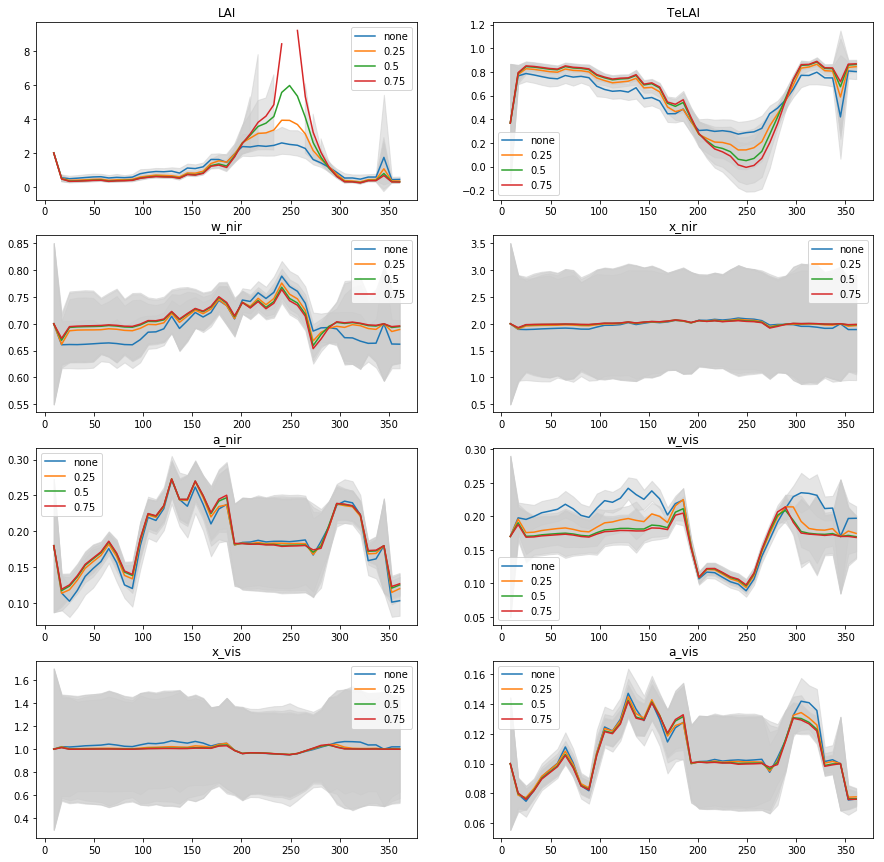

In [6]:
#mask[ 2200:2395, 450:700 ] = True # Bondville, h11v04

filepaths = ["/home/npounder/output/kafka/28Mar/kafkaout_Bondville_noprop/",
             "/home/npounder/output/kafka/28Mar/kafkaout_bondville_b_0-25/",
             "/home/npounder/output/kafka/28Mar/kafkaout_bondville_b_0-5/",
             "/home/npounder/output/kafka/28Mar/kafkaout_bondville_b_0-75/"]
legend = ("none", "0.25", "0.5", "0.75")
y = 2398; x= 569
x = 2298; y= 569

fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()
plot_all_params(axs, params, filepaths, 2006, x, y, legend)